In [3]:
import pandas as pd 
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

# Задача 1

In [2]:
data = pd.read_csv('flight_delays.csv')
data.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Month              100000 non-null  object
 1   DayofMonth         100000 non-null  object
 2   DayOfWeek          100000 non-null  object
 3   DepTime            100000 non-null  int64 
 4   UniqueCarrier      100000 non-null  object
 5   Origin             100000 non-null  object
 6   Dest               100000 non-null  object
 7   Distance           100000 non-null  int64 
 8   dep_delayed_15min  100000 non-null  object
dtypes: int64(2), object(7)
memory usage: 6.9+ MB


## Немножко преобработки

In [6]:
data['dep_delayed_15min'] = data.dep_delayed_15min == 'Y'
data['Month'] = data['Month'].apply(lambda x: int(x[2:]))
data['DayofMonth'] = data['DayofMonth'].apply(lambda x: int(x[2:]))
data['DayOfWeek'] = data['DayOfWeek'].apply(lambda x: int(x[2:]))
data['DepHour'] = data['DepTime'].apply(lambda x: int(int(x)//100))
data['DepMin'] = data['DepTime'].apply(lambda x: int(int(x)%100))
data['DepTotalMin'] = data['DepTime'].apply(lambda x: int(60*int(x)//100 + int(x)%100))

In [17]:
data.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min,DepHour,DepMin,DepTotalMin
0,8,21,7,1934,AA,ATL,DFW,732,False,19,34,1194
1,4,20,3,1548,US,PIT,MCO,834,False,15,48,976
2,9,2,5,1422,XE,RDU,CLE,416,False,14,22,875
3,11,25,6,1015,OO,DEN,MEM,872,False,10,15,624
4,10,7,6,1828,WN,MDW,OMA,423,True,18,28,1124


## Раз

In [36]:
data.dep_delayed_15min.sum()/len(data)

0.19044

## Два

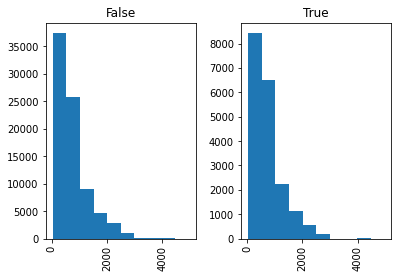

In [25]:
data.hist('Distance', by = 'dep_delayed_15min');

In [71]:
px.histogram(data.query('dep_delayed_15min'), x = 'Distance', title='Зависимость количества задержек от дальности полета')

## Три

In [34]:
data.groupby('Dest')[['dep_delayed_15min']].sum().sort_values(by = 'dep_delayed_15min',ascending = False).head()

,dep_delayed_15min
Dest,
ATL,1281
ORD,1072
DFW,656
EWR,584
LAX,525


## Четыре

In [56]:
season = lambda x: x//3 if x<12 else 0
data['Season'] = data['Month'].apply(season)
data.groupby('Season')[['dep_delayed_15min']].sum().sort_values(by = 'dep_delayed_15min',ascending = False).head()

,dep_delayed_15min
Season,
2,5723
0,4849
1,4295
3,4177


Самый "опаздывающий" сезон &mdash; лето.
## Пять

In [57]:
data.groupby('UniqueCarrier')[['dep_delayed_15min']].sum().sort_values(by = 'dep_delayed_15min',ascending = False).head(10)

,dep_delayed_15min
UniqueCarrier,
WN,3219
AA,1770
MQ,1448
DL,1373
UA,1322
OO,1277
US,1085
EV,1082
NW,1075


## Шесть

In [58]:
data.groupby('Origin')[['dep_delayed_15min']].sum().sort_values(by = 'dep_delayed_15min',ascending = False).head(10)

,dep_delayed_15min
Origin,
ATL,1506
ORD,1254
DFW,902
DEN,575
LAX,552
LAS,546
EWR,538
IAH,492
PHX,491


## Семь

In [72]:
px.histogram(data.query('dep_delayed_15min'), x = 'DayofMonth', title='Зависимость количества задержек от дня месяца')

Это самая непонятная для меня зависимость относительно остальных зависимостей. 

# 2 задача
Ну, все графики что я строил сверху были построены при помощи `plotly`.
# 3 задача
Формула сердца:
$$x=16sin^3t, y=13cost-5cos2t-2cos3t-cos4t$$

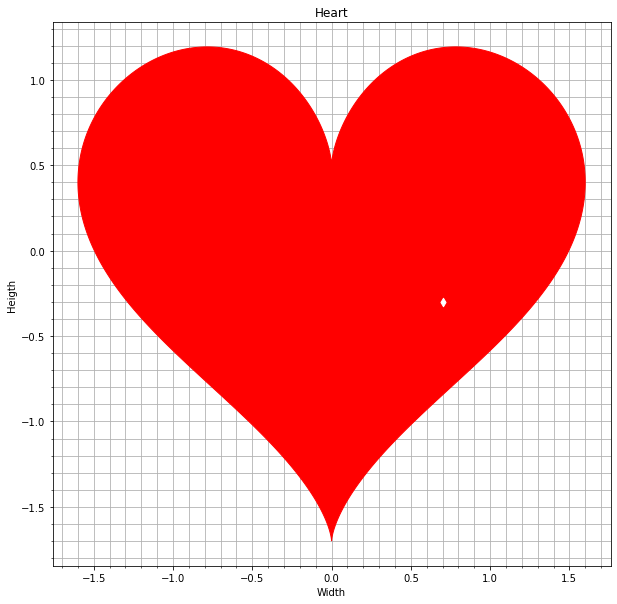

In [5]:
t = np.linspace(-np.pi,np.pi, 1000)
fx = lambda t: 16*np.sin(t)**3
fy = lambda t: 13*np.cos(t) - 5*np.cos(2*t) - 2*np.cos(3*t) - np.cos(4*t)
plt.figure(figsize = (10,10))
plt.fill(fx(t)/10, fy(t)/10, color = 'red',)
plt.scatter(0.7,-0.3,marker = 'd', c= 'white')
plt.minorticks_on()
plt.grid(which = 'both')
plt.rc('axes', axisbelow=True)
plt.xlabel('Width')
plt.ylabel('Heigth')
plt.title('Heart');

Шрифты у меня не установлены 

## 4 задача 
[Здесь](https://colab.research.google.com/drive/1Cix-obp3WKxFEMFlj5fwXOVT_wFW3DhX?usp=sharing)